### Ayudantía 4

**Subject**: Regression (Decision tree) - Applied to QSAR fish toxicity


## Libraries dependencies

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

from time import time
from pandas import read_csv
from numpy import arange

## Pre-processing functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Model
from sklearn.tree import DecisionTreeRegressor

## Tree display
from sklearn.tree import plot_tree

## Cross-Validation
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit

## Search
from sklearn.model_selection import GridSearchCV

## Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Customized function

In [2]:
def plot_feature_importances(model, features, width=10, height=6):
    """
        DESCRIPTION:
            Feature importance display function
        
        INPUT:
            @param model: Decision tree regression model
            @type model: sklearn.DecisionTreeRegressor
            
            @param features: feature names
            @type features: list
            
            @param width: width of the display space (default 10)
            @type width: int
            
            @param height: height of the display space (default 8)
            @type height: int
        
        OUTPUT:
            A graphic of feature importance
    """
    
    ## Number of features
    n_features = len(features)
    
    ## Feature importance display
    plt.figure(figsize=(width, height))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

# Problem: QSAR fish toxicity

**Target**: Predict LC50 (Lethal Concentration of 50%)

## Data loading

Source: [QSAR fish toxicity](https://archive.ics.uci.edu/ml/datasets/QSAR+fish+toxicity)

In [3]:
## Load data
data = read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00504/qsar_fish_toxicity.csv', 
                sep=';', header=None)

data.columns = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'LC50']

In [4]:
## Data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CIC0       908 non-null    float64
 1   SM1_Dz(Z)  908 non-null    float64
 2   GATS1i     908 non-null    float64
 3   NdsCH      908 non-null    int64  
 4   NdssC      908 non-null    int64  
 5   MLOGP      908 non-null    float64
 6   LC50       908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB


In [5]:
## data description
data.describe(include='all')

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


In [6]:
data.head(4)

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510


## Data pre-processing

In [7]:
## Partition sets
X_train, X_test = train_test_split(data, random_state=20200803)

## Standardizing
scale = StandardScaler().fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

## Predictors and target assignment
y_train = X_train[:, 6]
y_test = X_test[:, 6]
X_train = X_train[:, :6]
X_test = X_test[:, :6]

## Display shape of data
print('(train shape) X: {}, y: {}'.format(X_train.shape, y_train.shape))
print('(test shape) X: {}, y: {}'.format(X_test.shape, y_test.shape))

(train shape) X: (681, 6), y: (681,)
(test shape) X: (227, 6), y: (227,)


## Model selection  + Grid search CV

In [8]:
start = time()

## Cross-Validation's method instance
cvs = ShuffleSplit(n_splits=5, train_size=0.7)

## Parameter-space for searching
param ={'criterion': ['mse', 'friedman_mse', 'mae'],
        'min_samples_split': arange(1, 75),
        'max_depth': arange(1, 15)
       }

## Best model estimation by gridsearchcv
GS = GridSearchCV(estimator=DecisionTreeRegressor(), 
                  cv=cvs, n_jobs=-1, 
                  param_grid=param).fit(X=X_train, y=y_train)

## Display best model's hyperparameters
print('Best hyperparameters: {}'.format(GS.best_params_))

timeUp = time()-start
print('Time spent: {:.2f} seconds'.format(timeUp))

Best hyperparameters: {'criterion': 'mae', 'max_depth': 6, 'min_samples_split': 39}
Time spent: 15.87 seconds


In [9]:
## Compute score
## score is mse, lower is better.
GS.score(X_test, y_test)

0.4457823249877251

mae (Train): 0.6711
mae (Test): 0.4458


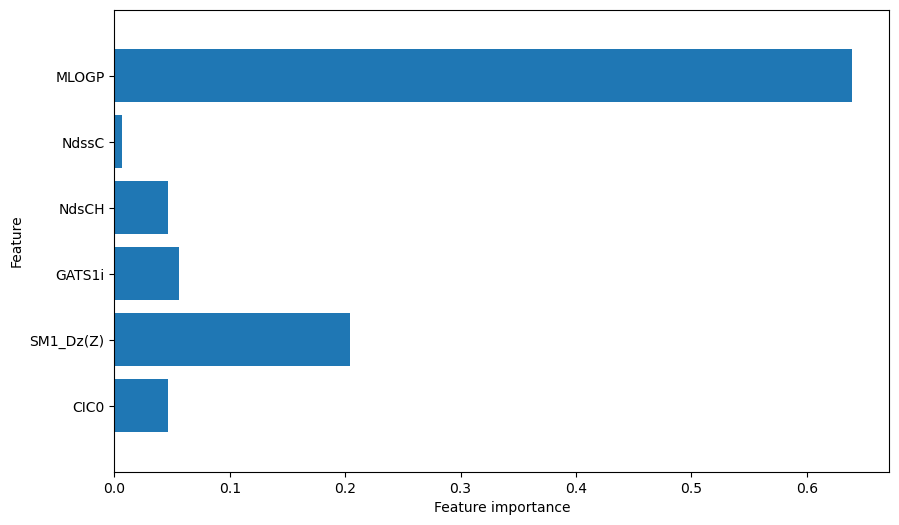

In [10]:
## Fitting a model with best parameters
model = DecisionTreeRegressor(**GS.best_params_).fit(X=X_train, y=y_train)

## Compute score using train set
print('{} (Train): {:.4f}'.format(model.criterion, model.score(X=X_train, y=y_train)))

## Compute score using test set
print('{} (Test): {:.4f}'.format(model.criterion, model.score(X=X_test, y=y_test)))

## feature importances display
plot_feature_importances(model, data.columns[:-1])


In [11]:
## compute prediction
prediction = model.predict(X_test)

print('R2  (test): {:.4f}'.format( model.score(X_test, y_test) ))
print('MSE (test): {:.4f}'.format( mean_squared_error(y_true=y_test, y_pred=prediction) ))
print('MAE (test): {:.4f}'.format( mean_absolute_error(y_true=y_test, y_pred=prediction) ))

R2  (test): 0.4458
MSE (test): 0.6455
MAE (test): 0.5761


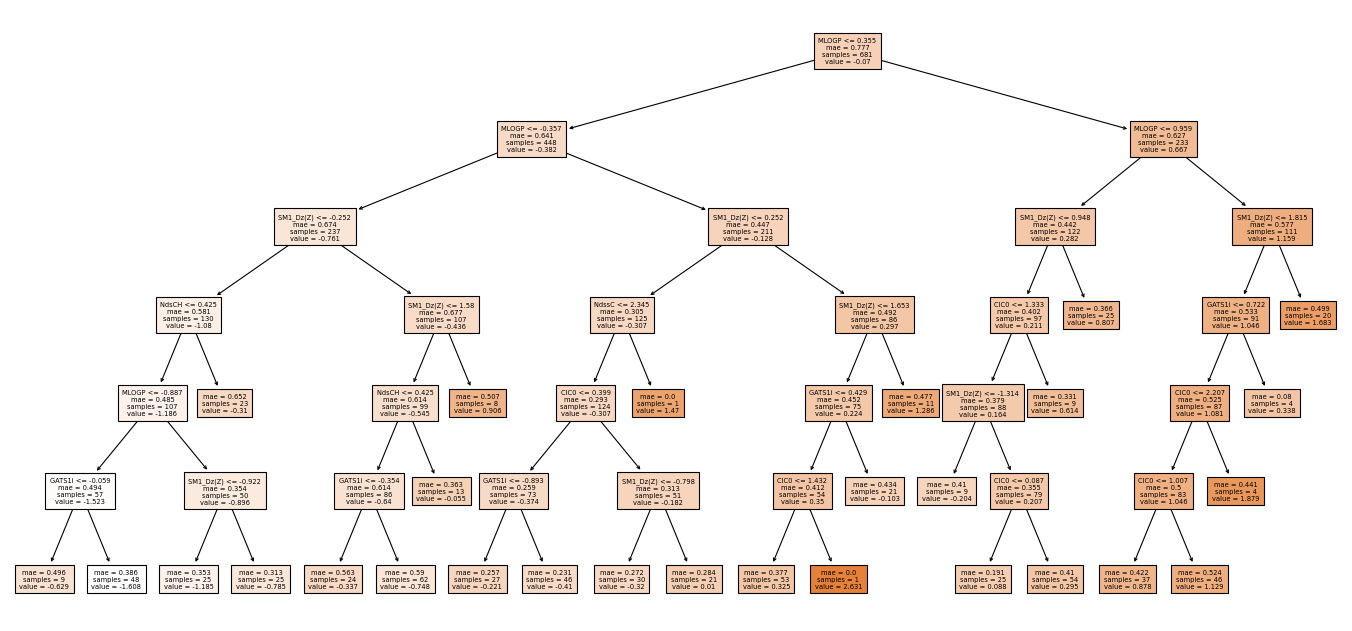

In [12]:
## Display tree

plt.figure(figsize=(17, 8), dpi=80)
plot_tree(decision_tree=model, 
          feature_names=data.columns[:-1],
          fontsize=6, filled=True);
plt.tight_layout()          
#plt.savefig('Regression_tree.pdf')

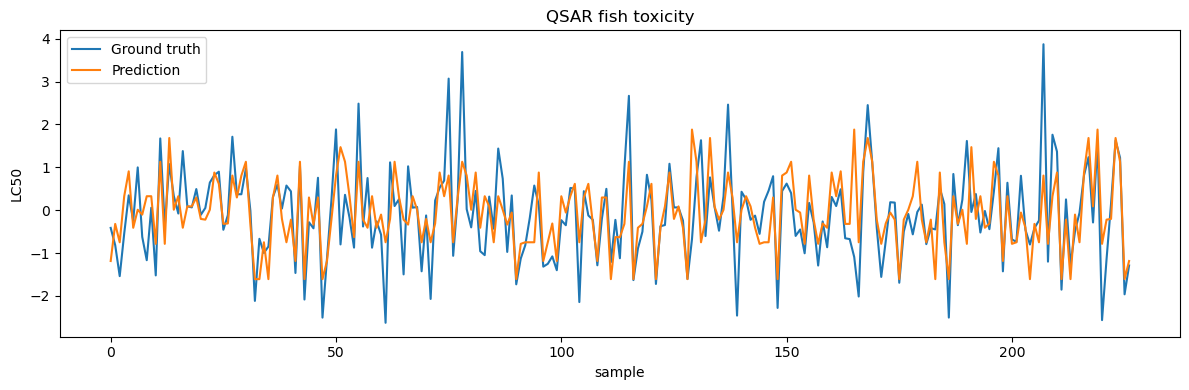

In [13]:
## Display prediction and ground truth
plt.figure(figsize=(12, 4))
plt.plot(y_test, label='Ground truth')
plt.plot(prediction, label='Prediction')
plt.xlabel('sample'); plt.ylabel('LC50')
plt.title('QSAR fish toxicity')
plt.legend()
plt.tight_layout()
plt.show()

## Naive Bayes

In [14]:
from numpy import where, array, linspace
from pandas import read_csv, DataFrame, concat, get_dummies
import matplotlib.pyplot as plt

%matplotlib inline

## Encoding function
from sklearn.preprocessing import LabelBinarizer, StandardScaler # dummy Encoding
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV

## Model
from sklearn.naive_bayes import GaussianNB

## Metrics
from sklearn.metrics import classification_report, plot_confusion_matrix

### Naive bayes computation

**(Acordarse que se llama naive porque se asume que las variables son independientes)**

Consider the following table

|     Instance  | 1 | 2 | 3 | 4 | 5 | 6 |
|--------------:|--:|--:|--:|--:|--:|--:|
|         $a_1$ | T | T | T | F | F | F |
|         $a_2$ | T | T | F | F | T | T |
|         $a_3$ | T | T | F | F | F | T |
|         Class | + | + | - | + | - | - |

The naive-bayes' equation is given by:

$$\begin{eqnarray*}
			\mathbb{P}(\text{Class} | a_1, a_2, a_3)
            &\propto & \;\; \mathbb{P}(a_1|\text{Class}) \\
			&		& \cdot \; \mathbb{P}(a_2|\text{Class}) \\
			&		& \cdot \; \mathbb{P}(a_3|\text{Class}) \\
			&		& \cdot \; \mathbb{P}(\text{Class})
		\end{eqnarray*}$$
        

**P(Class)**
        
| Class            | +   | -   |
|------------------|-----|-----|
| P(Class)         | 3/6 | 3/6 |


**P($a_3$|Class)**

| Class       | +   | -   |
|-------------|-----|-----|
| P(T\|Class) | 2/3 | 1/3 |
| P(F\|Class) | 1/3 | 2/3 |

**P($a_2$|Class)**

| Class       | +   | -   |
|---------------------|-----|-----|
| P(T\|Class) | 2/3 | 2/3 |
| P(F\|Class) | 1/3 | 1/3 |

**P($a_1$|Class)**

| Class       | +   | -   |
|---------------------|-----|-----|
| P(T\|Class) | 2/3 | 1/3 |
| P(F\|Class) | 1/3 | 2/3 |


#### Classify test input: [T, F, T]

$$
\begin{eqnarray*}
			\mathbb{P}\left(\text{Class} = + \left| \begin{array}{l}
				a_1=T \\
				a_2=F \\
				a_3 = T
			\end{array} \right. \right)&\propto & \frac{2}{3} \frac{1}{3} \frac{2}{3} \frac{3}{6} \approx 0.0741
		\end{eqnarray*}
$$

$$
\begin{eqnarray*}
			\mathbb{P}\left(\text{Class} = - \left| \begin{array}{l}
				a_1=T \\
				a_2=F \\
				a_3 = T
		\end{array} \right. \right)&\propto & \frac{1}{3} \frac{1}{3} \frac{1}{3} \frac{3}{6} \approx 0.0185
		\end{eqnarray*}
$$

Therefore, it is classified as +.

In [15]:
## Predictor set
X = array([['T', 'T', 'T'], 
           ['T', 'T', 'T'], 
           ['T', 'F', 'F'], 
           ['F', 'F', 'F'], 
           ['F', 'T', 'F'],
           ['F', 'T', 'T']
          ])

## Target set
y = array(['+', '+', '-', '+', '-', '-'])

## Labels
Values = ['F', 'T']
Target = ['-', '+']

In [16]:
## Encoding predictor and target
X = where(X=='F', 0, 1)
y = where(y=='-', 0, 1)

In [17]:
## Model instance and fitting
model = GaussianNB().fit(X, y)

In [18]:
## Compute test
test = array([['T', 'F', 'T']])

## Encoding test data
test_Cod = where(test=='F', 0, 1)

## Compute prediction
predict = model.predict(test_Cod)

## Display decoded prediction
print('{} se clasifica como: {}'.format(test[0], Target[predict[0]]))

['T' 'F' 'T'] se clasifica como: +


In [19]:
## Data
data = {'outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny',
                    'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
        'temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 
                        'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
        'humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 
                     'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'], 
        'wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 
                 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
        'PlayGame': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 
                     'Yes', 'Yes', 'Yes', 'Yes', 'No']
       }

## Convert into a dataframe
data = DataFrame(data)
data

,outlook,temperature,humidity,wind,PlayGame
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [20]:
## One-hot encoding by get dummies from pandas (just for illustration)
get_dummies(data, drop_first=True)

,outlook_Rain,outlook_Sunny,temperature_Hot,temperature_Mild,humidity_Normal,wind_Weak,PlayGame_Yes
0,0,1,1,0,0,1,0
1,0,1,1,0,0,0,0
2,0,0,1,0,0,1,1
3,1,0,0,1,0,1,1
4,1,0,0,0,1,1,1
5,1,0,0,0,1,0,0
6,0,0,0,0,1,0,1
7,0,1,0,1,0,1,0
8,0,1,0,0,1,1,1
9,1,0,0,1,1,1,1


In [21]:
## Encoder instances
OHEncondings = {} 
for label in data.columns:
    OHEncondings[label] = LabelBinarizer().fit(data[label])

## Make a copy of data to be used for encoding
data_Cod = data.copy()

## Apply encoding
for label in OHEncondings:
    
    ## Encodign by column
    encoding = OHEncondings[label]
    
    if encoding.y_type_ == 'binary':
        
        ## Apply binary encoding
        colname = ['{}_{}'.format(label, encoding.classes_[-1])]
        temp = encoding.transform(data[label])
    else:
        
        ## Apply multi-class encoding
        colname = ['{}_{}'.format(label, encoding.classes_[k]) for k in range(len(encoding.classes_))]
        temp = encoding.transform(data[label])
    
    ## Convert encoded column into dataframe
    temp = DataFrame(data=temp, columns=colname)
    
    ## Include enconded column into dataset
    for col in temp.columns:
        data_Cod[col] = temp[col]

## Drop categorical columns
data_Cod.drop(columns=data.columns, inplace=True)


In [22]:
## Display encoded dataset 
data_Cod

,outlook_Overcast,outlook_Rain,outlook_Sunny,temperature_Cool,temperature_Hot,temperature_Mild,humidity_Normal,wind_Weak,PlayGame_Yes
0,0,0,1,0,1,0,0,1,0
1,0,0,1,0,1,0,0,0,0
2,1,0,0,0,1,0,0,1,1
3,0,1,0,0,0,1,0,1,1
4,0,1,0,1,0,0,1,1,1
5,0,1,0,1,0,0,1,0,0
6,1,0,0,1,0,0,1,0,1
7,0,0,1,0,0,1,0,1,0
8,0,0,1,1,0,0,1,1,1
9,0,1,0,0,0,1,1,1,1


In [23]:
## Target labels
label = OHEncondings['PlayGame'].classes_

## Predictors and target data
X = data_Cod.drop(columns=['PlayGame_Yes'])
y = data_Cod['PlayGame_Yes']

## Partition set
N = len(X)//2
X_train, X_test = X[:N], X[N:]
y_train, y_test = y[:N], y[N:]

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.75      0.60      0.67         5

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



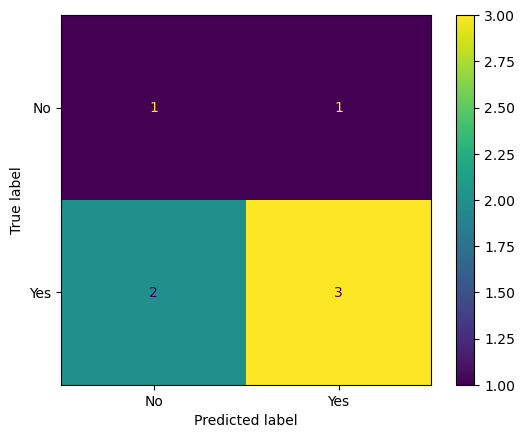

In [24]:
## Model instance and fitting
model = GaussianNB().fit(X_train, y_train)

## Compute prediction using test set
prediction = model.predict(X_test)

## Display classification report
print(classification_report(y_pred=prediction, y_true=y_test))

## Display confusion matrix
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test, display_labels=label)
plt.show()

### Problem: Breast Cancer Coimbra
**Target: Classification (0: No, 1: Yes)**

In [25]:
## Load data
data = read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')

## Feature names list
feature_names = data.columns[:-1]

In [26]:
data.head(4)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1


#### Data Pre-processing

In [27]:
## Predictors and target assignment
X = data.drop(columns=['Classification'])
y = data['Classification']

## Partition sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20200803)

## Standardizing
scale = StandardScaler().fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

## Display data shape
print('(train shape) X: {}, y: {}'.format(X_train.shape, y_train.shape))
print('(test shape) X: {}, y: {}'.format(X_test.shape, y_test.shape))

(train shape) X: (87, 9), y: (87,)
(test shape) X: (29, 9), y: (29,)


              precision    recall  f1-score   support

           1       0.61      0.92      0.73        12
           2       0.91      0.59      0.71        17

    accuracy                           0.72        29
   macro avg       0.76      0.75      0.72        29
weighted avg       0.79      0.72      0.72        29



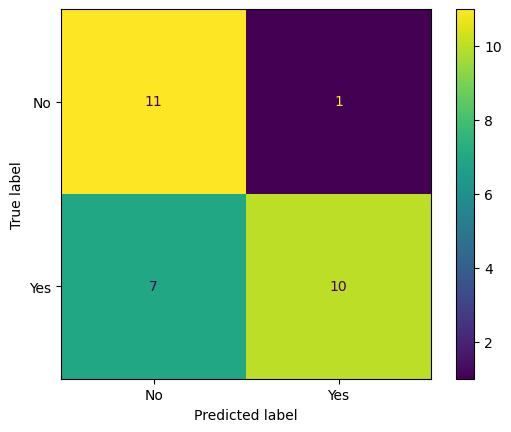

In [28]:
## Model instance and fitting
model = GaussianNB().fit(X_train, y_train)

## Compute prediction using test set
prediction = model.predict(X_test)

## Display classification report
print(classification_report(y_pred=prediction, y_true=y_test))

## Display confusion matrix
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test, display_labels=label)
plt.show()

#### Tunning Hyperparameters

In [29]:
## Cross-Validation's method instance
cvs = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=20200817)

## Parameter-space for searching
params_NB = {'var_smoothing': linspace(1e-18,2, num=20)}

## Best model estimation by gridsearchcv
GS = GridSearchCV(estimator=GaussianNB(), 
                  param_grid=params_NB, 
                  cv=cvs,
                  scoring='accuracy',
                  n_jobs=-1).fit(X_train, y_train)

## Display best model's hyperparameters
print('Best parameters value')
for hiperparam, valor in GS.best_params_.items():
    print('{}: {}'.format(hiperparam, valor))

Best parameters value
var_smoothing: 1e-18


              precision    recall  f1-score   support

           1       0.61      0.92      0.73        12
           2       0.91      0.59      0.71        17

    accuracy                           0.72        29
   macro avg       0.76      0.75      0.72        29
weighted avg       0.79      0.72      0.72        29



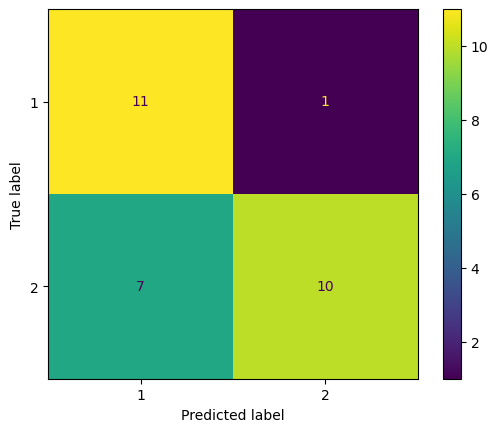

In [30]:
## Fitting a model with best parameters
model = GaussianNB(**GS.best_params_).fit(X_train, y_train)

## Compute prediction using test set
prediccion = model.predict(X_test)

## Display classification report
print(classification_report(y_pred=prediccion, y_true=y_test))

## Display confusion matrix
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test)
plt.show()